# Lead Scoring Case Study

# Problem Statement

The X Education company that sell online courses to industry professionals wants to improve it’s lead conversion rate from 30% to 80% . The company wants to deploy a model that can assess leads based on certain factors and assign a score to the leads in such a way that the ones that have more chance of conversion should have higher lead scores, called as hot Leads . The idea is to focus on nurturing the hot leads in the middle stage of the opportunity cycle  so that the final conversion rate is improved. 

# Approach to be followed for the Model Building 




1.	Read and understand historical lead data 
2.	Clean the data 
3.	Prepare data 
4.	Spilt Train & Test data 
5.	Feature Scaling 
6.	Check for correlations between variables 
7.	Build the model 
8.	Feature Selection using RFE
9.	Assessing the Model with Statsmodel
10.	Verify model against metrics 
11.	Plot ROC Curve 
12.	Identify optimal cut-off points
13.	Make predictions on the Test set  
14.	Assign Lead Scores 
15.	Conclude the analysis 



In [1]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Importing all the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn import metrics
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import precision_score, recall_score

In [3]:
#to view large outputs
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

# Step 1 Data understanding and Cleaning

### 1.1 Reading and Understanding the Data

In [4]:
# Importing dataset
df = pd.read_csv("C:\\Users\Bharath\Downloads\Leads.csv")
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [5]:
# Check the shape of data frame
df.shape

(9240, 37)

In [6]:
# printing the information of variables to check their data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [7]:
# Printing descriptive  statistics of numeric columns in the data
df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


### Observations: 
- Dataset has 9240 rows and 37 columns.
- There are a few rows with missing values, that needs attention.
- It looks like there are outliers present in  'Total Time Spent on Website', 'TotalVisits', 'Page Views Per Visit',  since the mean is almost twice or more than 50th percentile. 

### 1.2 Cleaning the data

In [8]:
#dropping Lead Number and Prospect ID since they are redundant variables

df.drop(['Prospect ID', 'Lead Number'], axis=1, inplace = True)

In [9]:
# Replacing 'Select' with NaN (Since it means no option is selected)
df = df.replace(['select','Select'],np.nan)

In [10]:
# Checking the percentage of missing values
round(100*(df.isnull().sum()/len(df.index)), 2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper 

In [11]:
#dropping cols with more than 30% missing values
for i in df.columns:
    if((100*(df[i].isnull().sum()/len(df.index))) >= 30):
        df.drop(i, axis = 1, inplace = True)

In [12]:
round(100*(df.isnull().sum()/len(df.index)), 2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Advertisement                             0.00
Through Re

### Following columns have null values :
    - Lead Source
    - Total Visits
    - Page Views Per Visit
    - Country
    - Last Activity    
    - What is your current occupation
    - What matters most to you in choosing a course
    
Let us see and decide whather we need to impute values in the above column or drop the columns.

In [13]:
# Checking if there are columns with one unique value since it won't affect our analysis
df.nunique()

Lead Origin                                         5
Lead Source                                        21
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Country                                            38
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Magazine                                            1
Newspaper Article                                   2
X Education Forums                                  2
Newspaper                                           2
Digital Advertisement                               2
Through Recommendations     

In [14]:
# Dropping unique valued columns
df=df.drop(['Magazine','Receive More Updates About Our Courses','I agree to pay the amount through cheque','Get updates on DM Content','Update me on Supply Chain Content'],axis=1)

In [15]:
round(100*(df.isnull().sum()/len(df.index)), 2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Advertisement                             0.00
Through Recommendations                           0.00
A free cop

In [16]:
# Treating Country Column
round(100*(df['Country'].value_counts(dropna=False)/len(df.index)), 2).head()

India                   70.26
NaN                     26.63
United States            0.75
United Arab Emirates     0.57
Singapore                0.26
Name: Country, dtype: float64

In [17]:
# Its evident that about 97% of the country column is either 'India' or a missing value so lets drop the column
df = df.drop(['Country'], axis=1)

In [18]:
# Check the value counts for the column Lead Source
df['Lead Source'].value_counts(dropna=False)

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
NaN                    36
bing                    6
google                  5
Click2call              4
Live Chat               2
Social Media            2
Press_Release           2
youtubechannel          1
blog                    1
welearnblog_Home        1
Pay per Click Ads       1
testone                 1
NC_EDM                  1
WeLearn                 1
Name: Lead Source, dtype: int64

In [19]:
df['Lead Source'].unique()

array(['Olark Chat', 'Organic Search', 'Direct Traffic', 'Google',
       'Referral Sites', 'Welingak Website', 'Reference', 'google',
       'Facebook', nan, 'blog', 'Pay per Click Ads', 'bing',
       'Social Media', 'WeLearn', 'Click2call', 'Live Chat',
       'welearnblog_Home', 'youtubechannel', 'testone', 'Press_Release',
       'NC_EDM'], dtype=object)

In [20]:
#replacing Nan Values and combining low frequency values
df['Lead Source'] = df['Lead Source'].replace(np.nan,'Others')
df['Lead Source'] = df['Lead Source'].replace('google','Google')
df['Lead Source'] = df['Lead Source'].replace(['Reference', 'Facebook', 'blog', 'Pay per Click Ads', 'bing','Social Media',
                                               'WeLearn', 'Click2call', 'Live Chat','welearnblog_Home', 'youtubechannel',
                                               'testone', 'Press_Release','NC_EDM'],'Others')

In [21]:
df['Lead Source'].value_counts(dropna=False)

Google              2873
Direct Traffic      2543
Olark Chat          1755
Organic Search      1154
Others               648
Welingak Website     142
Referral Sites       125
Name: Lead Source, dtype: int64

In [22]:
# Check the value counts for the column "What is your current Occupation"
df['What is your current occupation'].value_counts(dropna=False)

Unemployed              5600
NaN                     2690
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [23]:
round(100*(df['What is your current occupation'].value_counts(dropna=False)/len(df.index)), 2).head()

Unemployed              60.61
NaN                     29.11
Working Professional     7.64
Student                  2.27
Other                    0.17
Name: What is your current occupation, dtype: float64

In [24]:
# Since there are a lot of missing values we can impute median but that would make 90% of the column as 'Unemployed' so lets just delete the column
df = df.drop(['What is your current occupation'], axis=1)

In [25]:
# Check the value counts for the column What matters most to you in choosing a course 
round(100*(df['What matters most to you in choosing a course'].value_counts(dropna=False)/len(df.index)), 2).head()

Better Career Prospects      70.65
NaN                          29.32
Flexibility & Convenience     0.02
Other                         0.01
Name: What matters most to you in choosing a course, dtype: float64

In [26]:
# Dropping the 'What matters most to you in choosing a course' Column.
df = df.drop(['What matters most to you in choosing a course'], axis=1)

In [27]:
round(100*(df.isnull().sum()/len(df.index)), 2)

Lead Origin                               0.00
Lead Source                               0.00
Do Not Email                              0.00
Do Not Call                               0.00
Converted                                 0.00
TotalVisits                               1.48
Total Time Spent on Website               0.00
Page Views Per Visit                      1.48
Last Activity                             1.11
Search                                    0.00
Newspaper Article                         0.00
X Education Forums                        0.00
Newspaper                                 0.00
Digital Advertisement                     0.00
Through Recommendations                   0.00
A free copy of Mastering The Interview    0.00
Last Notable Activity                     0.00
dtype: float64

In [28]:
df.shape

(9240, 17)

In [29]:
# Deleting the rows containing Null values
df = df.dropna()
df.shape

(9103, 17)

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9103 entries, 0 to 9239
Data columns (total 17 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9103 non-null   object 
 1   Lead Source                             9103 non-null   object 
 2   Do Not Email                            9103 non-null   object 
 3   Do Not Call                             9103 non-null   object 
 4   Converted                               9103 non-null   int64  
 5   TotalVisits                             9103 non-null   float64
 6   Total Time Spent on Website             9103 non-null   int64  
 7   Page Views Per Visit                    9103 non-null   float64
 8   Last Activity                           9103 non-null   object 
 9   Search                                  9103 non-null   object 
 10  Newspaper Article                       9103 non-null   obje

##### Our data frame is free from missing values

## 1.3 Outlier Treatment

In [31]:
df.describe()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9103.000000,9103.000000,9103.000000,9103.000000
mean,0.380204,3.445238,481.350104,2.362820
std,0.485464,4.854853,545.066142,2.161418
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,9.000000,1.000000
50%,0.000000,3.000000,244.000000,2.000000
75%,1.000000,5.000000,919.500000,3.000000
max,1.000000,251.000000,2272.000000,55.000000


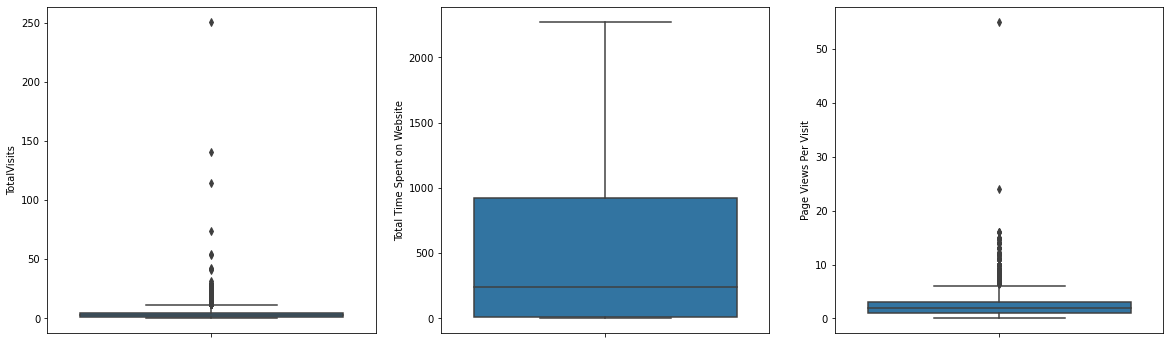

In [32]:
# Check the outliers in all the numeric columns
plt.figure(figsize=(20,6))
plt.subplot(1,3,1)
sns.boxplot(y = 'TotalVisits', data = df)
plt.subplot(1,3,2)
sns.boxplot(y = 'Total Time Spent on Website', data = df)
plt.subplot(1,3,3)
sns.boxplot(y = 'Page Views Per Visit', data = df)
plt.show()

- Outliers are present in 'TotalVisits', 'Page Views Per Visit'.

In [33]:
df.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9103.000000,9103.000000,9103.000000,9103.000000
mean,0.380204,3.445238,481.350104,2.362820
std,0.485464,4.854853,545.066142,2.161418
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,9.000000,1.000000
50%,0.000000,3.000000,244.000000,2.000000
75%,1.000000,5.000000,919.500000,3.000000
90%,1.000000,7.000000,1372.000000,5.000000
95%,1.000000,10.000000,1556.900000,6.000000
99%,1.000000,17.000000,1838.960000,9.000000


In [34]:
# Removing values beyond 99% for Total Visits
total_visits = df['TotalVisits'].quantile(0.99)
df = df[df["TotalVisits"] < total_visits]
df["TotalVisits"].describe(percentiles=[.25,.5,.75,.90,.95,.99])

count    9004.000000
mean        3.182474
std         2.935631
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
90%         7.000000
95%         9.000000
99%        13.000000
max        16.000000
Name: TotalVisits, dtype: float64

In [35]:
# Removing values beyond 99% for page Views Per Visit
page_visits = df['Page Views Per Visit'].quantile(0.99)
df = df[df["Page Views Per Visit"] < page_visits]
df["Page Views Per Visit"].describe(percentiles=[.25,.5,.75,.90,.95,.99])

count    8892.000000
mean        2.229871
std         1.837171
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
90%         5.000000
95%         6.000000
99%         7.000000
max         8.000000
Name: Page Views Per Visit, dtype: float64

In [36]:
df.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,8892.000000,8892.000000,8892.000000,8892.000000
mean,0.379780,3.088507,476.563878,2.229871
std,0.485359,2.822722,544.325819,1.837171
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,3.750000,1.000000
50%,0.000000,3.000000,239.000000,2.000000
75%,1.000000,4.000000,908.250000,3.000000
90%,1.000000,7.000000,1370.000000,5.000000
95%,1.000000,8.000000,1553.000000,6.000000
99%,1.000000,13.000000,1837.180000,7.000000


# Step 2 Data Analysis

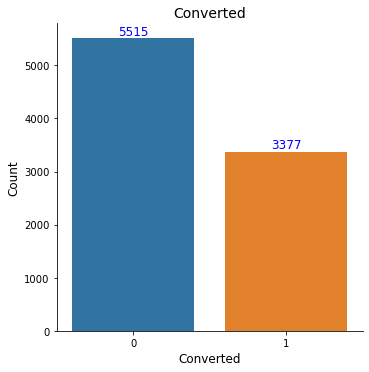

In [37]:
# Concertion Rate - to check class imbalance
plot = sns.catplot(x="Converted", kind="count", data=df)
plt.title('Converted', fontsize = 14)
plt.xlabel("Converted", fontsize = 12)
plt.ylabel("Count", fontsize = 12)
ax = plot.facet_axis(0,0)
for p in ax.patches:        
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), p.get_height(), fontsize=12, color='blue', ha='center', va='bottom')
    
plt.show()

- We have 38% conversion rate so there is no class imbalance.

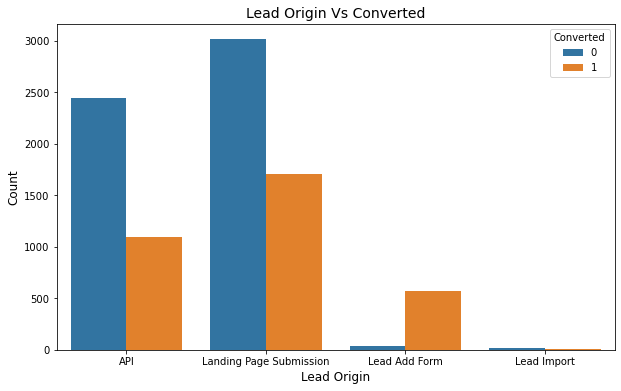

In [38]:
# Lead Origin
plt.figure(figsize=(10,6))
sns.countplot(x="Lead Origin", hue = "Converted", data=df)
plt.title('Lead Origin Vs Converted', fontsize = 14)
plt.xlabel("Lead Origin", fontsize = 12)
plt.ylabel("Count", fontsize = 12)
plt.show()

- From the above graph, maximum conversion happened from 'Landing Page Submission' but 'API' has better covertion rate

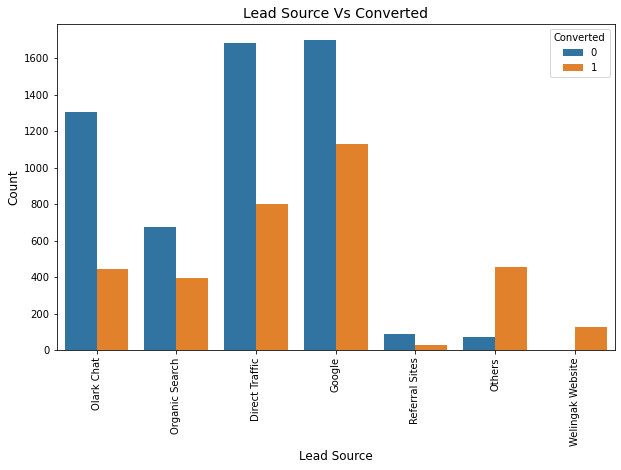

In [39]:
# Lead Source
plt.figure(figsize=(10,6))
sns.countplot(x="Lead Source", hue = "Converted", data=df)
plt.title('Lead Source Vs Converted', fontsize = 14)
plt.xlabel("Lead Source", fontsize = 12)
plt.ylabel("Count", fontsize = 12)
plt.xticks(rotation=90)
plt.show()

- Major conversion in the lead source is from 'Google', 'Direct Traffic'.

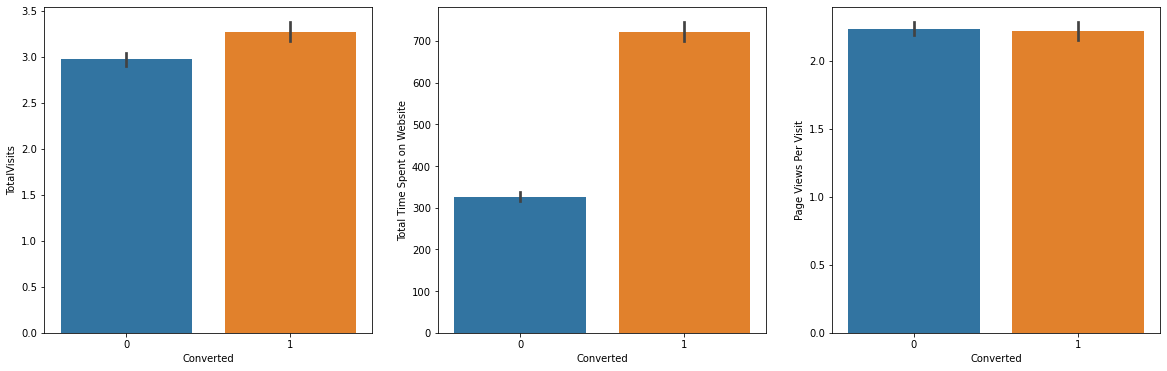

In [40]:
# Numerical Variables
plt.figure(figsize = (20,6))
plt.subplot(1,3,1)
sns.barplot(y = 'TotalVisits', x='Converted', data = df)
plt.subplot(1,3,2)
sns.barplot(y = 'Total Time Spent on Website', x='Converted', data = df)
plt.subplot(1,3,3)
sns.barplot(y = 'Page Views Per Visit', x='Converted', data = df)
plt.show()

# Step 3 Data Preparation

In [41]:
# checking the info of the data frame
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8892 entries, 0 to 9239
Data columns (total 17 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             8892 non-null   object 
 1   Lead Source                             8892 non-null   object 
 2   Do Not Email                            8892 non-null   object 
 3   Do Not Call                             8892 non-null   object 
 4   Converted                               8892 non-null   int64  
 5   TotalVisits                             8892 non-null   float64
 6   Total Time Spent on Website             8892 non-null   int64  
 7   Page Views Per Visit                    8892 non-null   float64
 8   Last Activity                           8892 non-null   object 
 9   Search                                  8892 non-null   object 
 10  Newspaper Article                       8892 non-null   obje

In [42]:
df.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,No,No,No,No,No,No,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,No,No,No,No,No,No,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,No,No,No,No,No,No,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,No,No,No,No,No,No,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,No,No,No,No,No,No,No,Modified


In [43]:
#getting a list of categorical columns
df_cat= df.select_dtypes(include=['object']).columns
df_cat

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call', 'Last Activity', 'Search', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations', 'A free copy of Mastering The Interview', 'Last Notable Activity'], dtype='object')

In [44]:
# List of variables to map
variablelist = ['Do Not Email', 'Do Not Call', 'Search', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations', 
                                 'A free copy of Mastering The Interview']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the columns
df[variablelist] = df[variablelist].apply(binary_map)

### For categorical variables with multiple levels, creating dummy features

In [45]:
df.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,0,0,0,0,0,0,0,Modified
1,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,0,0,0,0,0,0,0,Email Opened
2,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,0,0,0,0,0,0,1,Email Opened
3,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,0,0,0,0,0,0,0,Modified
4,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,0,0,0,0,0,0,0,Modified


In [46]:
# Creating dummy variables for the remaining categorical variables and dropping the level

# Create dummy variables using the 'get_dummies'
dummy = pd.get_dummies(df[['Lead Origin','Lead Source','Last Activity','Last Notable Activity']], drop_first=True)
# Add the results to the master dataframe
df_final = pd.concat([df, dummy], axis=1)
df_final.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,Last Notable Activity,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,0,0,0,0,0,0,0,Modified,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,0,0,0,0,0,0,0,Email Opened,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,0,0,0,0,0,0,1,Email Opened,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,0,0,0,0,0,0,0,Modified,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,0,0,0,0,0,0,0,Modified,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [47]:
# Dropping the original columns
df_final = df_final.drop(['Lead Origin','Lead Source','Last Activity','Last Notable Activity'], axis=1)
df_final.head()

,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0,0.0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,5.0,674,2.5,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,0,0,1,2.0,1532,2.0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1.0,305,1.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,0,0,1,2.0,1428,1.0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [48]:
df_final.shape

(8892, 53)

- Since there are a lot of columns, we will not be looking at the correlation using heat map as we will not be able to infer anything from the heat map due to huge data. We can eleminate highly correlated variables after RFE

### Test-Train Split

In [49]:
# splitting the data
y = df_final['Converted']

y.head()

X = df_final.drop('Converted', axis=1)

In [50]:
# Splitting the dataset into 70% and 30% for train and test respectively
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

### Feature Scaling with standard scalar

In [51]:
scaler = StandardScaler()
X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
8736,0,0,-1.092137,-0.883156,-1.214997,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4453,0,0,-0.374234,2.003808,-0.112712,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
625,1,0,-1.092137,-0.883156,-1.214997,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1525,0,0,-0.015283,0.552078,0.438430,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3381,0,0,0.343668,0.616232,0.989572,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


# Step 4 Model Building

In [52]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6224
Model:                            GLM   Df Residuals:                     6176
Model Family:                Binomial   Df Model:                           47
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2711.0
Date:                Mon, 17 May 2021   Deviance:                       5422.0
Time:                        17:05:09   Pearson chi2:                 6.34e+03
No. Iterations:                    22                                         
Covariance Type:            nonrobust                                         
======================================================================================================================
                                                         coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------
const                                                 21.5707   7.95e+04      0.000      1.000   -1.56e+05    1.56e+05
Do Not Email                                          -1.2728      0.217     -5.878      0.000      -1.697      -0.848
Do Not Call                                           22.6803   5.44e+04      0.000      1.000   -1.07e+05    1.07e+05
TotalVisits                                            0.3238      0.051      6.296      0.000       0.223       0.425
Total Time Spent on Website                            1.1029      0.040     27.557      0.000       1.024       1.181
Page Views Per Visit                                  -0.2206      0.057     -3.866      0.000      -0.332      -0.109
Search                                                -0.2816      0.837     -0.336      0.737      -1.922       1.359
Newspaper Article                                  -6.192e-09   1.76e-05     -0.000      1.000   -3.45e-05    3.45e-05
X Education Forums                                 -1.086e-09   1.48e-05  -7.35e-05      1.000   -2.89e-05    2.89e-05
Newspaper                                            -25.6168   7.95e+04     -0.000      1.000   -1.56e+05    1.56e+05
Digital Advertisement                                 23.0900   7.95e+04      0.000      1.000   -1.56e+05    1.56e+05
Through Recommendations                               23.6930   3.53e+04      0.001      0.999   -6.91e+04    6.91e+04
A free copy of Mastering The Interview                -0.0082      0.106     -0.077      0.938      -0.217       0.200
Lead Origin_Landing Page Submission                   -0.0355      0.105     -0.337      0.736      -0.242       0.171
Lead Origin_Lead Add Form                              3.5078      0.717      4.890      0.000       2.102       4.914
Lead Origin_Lead Import                                0.7016      0.847      0.828      0.408      -0.959       2.362
Lead Source_Google                                     0.3975      0.114      3.475      0.001       0.173       0.622
Lead Source_Olark Chat                                 1.3746      0.163      8.427      0.000       1.055       1.694
Lead Source_Organic Search                             0.0791      0.131      0.606      0.545      -0.177       0.335
Lead Source_Others                                     0.8805      0.688      1.281      0.200      -0.467       2.228
Lead Source_Referral Sites                            -0.0800      0.354     -0.226      0.821      -0.775       0.615
Lead Source_Welingak Website                           2.3237      1.018      2.283      0.022       0.329       4.319
Last Activity_Converted to Lead                      -24.9299   5.17e+04     -0.000      1.000   -1.01e+05  

### Feature Selection Using RFE

In [53]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [54]:
from sklearn.feature_selection import RFE

# running RFE with 15 variables as output

rfe = RFE(logreg, 15)            
rfe = rfe.fit(X_train, y_train)

In [55]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('Do Not Call', False, 9),
 ('TotalVisits', False, 24),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 25),
 ('Search', False, 28),
 ('Newspaper Article', False, 37),
 ('X Education Forums', False, 36),
 ('Newspaper', False, 3),
 ('Digital Advertisement', False, 20),
 ('Through Recommendations', True, 1),
 ('A free copy of Mastering The Interview', False, 34),
 ('Lead Origin_Landing Page Submission', False, 31),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 17),
 ('Lead Source_Google', False, 15),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 32),
 ('Lead Source_Others', True, 1),
 ('Lead Source_Referral Sites', False, 30),
 ('Lead Source_Welingak Website', True, 1),
 ('Last Activity_Converted to Lead', True, 1),
 ('Last Activity_Email Bounced', True, 1),
 ('Last Activity_Email Link Clicked', False, 13),
 ('Last Activity_Email Marked Spam', False, 16),
 ('Last Activit

In [56]:
# RFE selected columns
col = X_train.columns[rfe.support_]
col

Index(['Do Not Email', 'Total Time Spent on Website', 'Through Recommendations', 'Lead Origin_Lead Add Form', 'Lead Source_Olark Chat', 'Lead Source_Others', 'Lead Source_Welingak Website', 'Last Activity_Converted to Lead', 'Last Activity_Email Bounced', 'Last Activity_Had a Phone Conversation', 'Last Activity_Olark Chat Conversation', 'Last Notable Activity_Email Link Clicked', 'Last Notable Activity_Had a Phone Conversation', 'Last Notable Activity_SMS Sent', 'Last Notable Activity_Unreachable'], dtype='object')

### Assessing the model with StatsModels - Model 2

In [57]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6224
Model:                            GLM   Df Residuals:                     6208
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2768.4
Date:                Mon, 17 May 2021   Deviance:                       5536.8
Time:                        17:05:12   Pearson chi2:                 6.35e+03
No. Iterations:                    22                                         
Covariance Type:            nonrobust                                         
==================================================================================================================
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
const                                             -1.1699      0.050    -23.415      0.000      -1.268      -1.072
Do Not Email                                      -1.2624      0.190     -6.637      0.000      -1.635      -0.890
Total Time Spent on Website                        1.1117      0.039     28.269      0.000       1.035       1.189
Through Recommendations                           23.7604   3.56e+04      0.001      0.999   -6.98e+04    6.99e+04
Lead Origin_Lead Add Form                          3.1001      0.453      6.836      0.000       2.211       3.989
Lead Source_Olark Chat                             1.1451      0.101     11.386      0.000       0.948       1.342
Lead Source_Others                                 1.0809      0.408      2.652      0.008       0.282       1.880
Lead Source_Welingak Website                       2.5049      0.854      2.932      0.003       0.831       4.179
Last Activity_Converted to Lead                   -1.1239      0.190     -5.914      0.000      -1.496      -0.751
Last Activity_Email Bounced                       -1.3408      0.411     -3.260      0.001      -2.147      -0.535
Last Activity_Had a Phone Conversation             0.6313      0.825      0.765      0.444      -0.986       2.249
Last Activity_Olark Chat Conversation             -1.5221      0.156     -9.785      0.000      -1.827      -1.217
Last Notable Activity_Email Link Clicked          -0.8163      0.278     -2.936      0.003      -1.361      -0.271
Last Notable Activity_Had a Phone Conversation    23.4851   2.11e+04      0.001      0.999   -4.13e+04    4.13e+04
Last Notable Activity_SMS Sent                     1.4870      0.079     18.923      0.000       1.333       1.641
Last Notable Activity_Unreachable                  1.6573      0.531      3.124      0.002       0.617       2.697
==================================================================================================================
"""

- Removing column 'Through Recommendations' as it has high pvalue and hence is insignificant

In [58]:
# Droping the column 'Through Recommendations'
col = col.drop('Through Recommendations',1)

### Model - 3

In [59]:
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6224
Model:                            GLM   Df Residuals:                     6209
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2770.4
Date:                Mon, 17 May 2021   Deviance:                       5540.9
Time:                        17:05:12   Pearson chi2:                 6.35e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
==================================================================================================================
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
const                                             -1.1676      0.050    -23.390      0.000      -1.265      -1.070
Do Not Email                                      -1.2631      0.190     -6.643      0.000      -1.636      -0.890
Total Time Spent on Website                        1.1108      0.039     28.277      0.000       1.034       1.188
Lead Origin_Lead Add Form                          3.1001      0.453      6.837      0.000       2.211       3.989
Lead Source_Olark Chat                             1.1431      0.100     11.375      0.000       0.946       1.340
Lead Source_Others                                 1.0783      0.408      2.645      0.008       0.279       1.877
Lead Source_Welingak Website                       2.5024      0.854      2.930      0.003       0.828       4.177
Last Activity_Converted to Lead                   -1.1256      0.190     -5.924      0.000      -1.498      -0.753
Last Activity_Email Bounced                       -1.3416      0.411     -3.262      0.001      -2.148      -0.536
Last Activity_Had a Phone Conversation             0.6294      0.825      0.763      0.446      -0.988       2.247
Last Activity_Olark Chat Conversation             -1.5232      0.156     -9.794      0.000      -1.828      -1.218
Last Notable Activity_Email Link Clicked          -0.8177      0.278     -2.941      0.003      -1.363      -0.273
Last Notable Activity_Had a Phone Conversation    22.4841   1.28e+04      0.002      0.999    -2.5e+04    2.51e+04
Last Notable Activity_SMS Sent                     1.4852      0.079     18.905      0.000       1.331       1.639
Last Notable Activity_Unreachable                  1.6746      0.527      3.180      0.001       0.643       2.707
==================================================================================================================
"""

- Removing column 'Last Notable Activity_Had a Phone Conversation' as it has high pvalue and hence is insignificant

In [60]:
# Droping the column 'Last Notable Activity_Had a Phone Conversation'
col = col.drop('Last Notable Activity_Had a Phone Conversation',1)

### Model - 4

In [61]:
X_train_sm = sm.add_constant(X_train[col])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6224
Model:                            GLM   Df Residuals:                     6210
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2774.3
Date:                Mon, 17 May 2021   Deviance:                       5548.6
Time:                        17:05:12   Pearson chi2:                 6.36e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -1.1669      0.050    -23.385      0.000      -1.265      -1.069
Do Not Email                                -1.2690      0.190     -6.681      0.000      -1.641      -0.897
Total Time Spent on Website                  1.1098      0.039     28.281      0.000       1.033       1.187
Lead Origin_Lead Add Form                    3.0982      0.453      6.832      0.000       2.209       3.987
Lead Source_Olark Chat                       1.1417      0.100     11.366      0.000       0.945       1.339
Lead Source_Others                           1.0771      0.408      2.643      0.008       0.278       1.876
Lead Source_Welingak Website                 2.5038      0.854      2.931      0.003       0.830       4.178
Last Activity_Converted to Lead             -1.1256      0.190     -5.925      0.000      -1.498      -0.753
Last Activity_Email Bounced                 -1.3364      0.411     -3.250      0.001      -2.142      -0.530
Last Activity_Had a Phone Conversation       2.0460      0.647      3.161      0.002       0.777       3.314
Last Activity_Olark Chat Conversation       -1.5231      0.156     -9.794      0.000      -1.828      -1.218
Last Notable Activity_Email Link Clicked    -0.8177      0.278     -2.941      0.003      -1.363      -0.273
Last Notable Activity_SMS Sent               1.4852      0.079     18.908      0.000       1.331       1.639
Last Notable Activity_Unreachable            1.6742      0.527      3.180      0.001       0.642       2.706
============================================================================================================
"""

### Checking VIFs

In [62]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Lead Origin_Lead Add Form,13.89
4,Lead Source_Others,10.77
5,Lead Source_Welingak Website,4.12
0,Do Not Email,1.81
7,Last Activity_Email Bounced,1.79
3,Lead Source_Olark Chat,1.60
9,Last Activity_Olark Chat Conversation,1.36
1,Total Time Spent on Website,1.26
11,Last Notable Activity_SMS Sent,1.18
10,Last Notable Activity_Email Link Clicked,1.02


- Lets drop 'Lead Source_Others' since it has both p-value and VIF high.

In [63]:
# Droping the column 'Lead Source_Others'
col = col.drop('Lead Source_Others',1)

### Model - 5

In [64]:
X_train_sm = sm.add_constant(X_train[col])
logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6224
Model:                            GLM   Df Residuals:                     6211
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2777.3
Date:                Mon, 17 May 2021   Deviance:                       5554.7
Time:                        17:05:12   Pearson chi2:                 6.36e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -1.1532      0.049    -23.313      0.000      -1.250      -1.056
Do Not Email                                -1.2687      0.190     -6.685      0.000      -1.641      -0.897
Total Time Spent on Website                  1.1020      0.039     28.226      0.000       1.025       1.179
Lead Origin_Lead Add Form                    4.1539      0.219     18.925      0.000       3.724       4.584
Lead Source_Olark Chat                       1.1246      0.100     11.238      0.000       0.928       1.321
Lead Source_Welingak Website                 1.4300      0.752      1.902      0.057      -0.043       2.903
Last Activity_Converted to Lead             -1.1269      0.190     -5.936      0.000      -1.499      -0.755
Last Activity_Email Bounced                 -1.3431      0.411     -3.268      0.001      -2.148      -0.538
Last Activity_Had a Phone Conversation       2.0333      0.646      3.145      0.002       0.766       3.300
Last Activity_Olark Chat Conversation       -1.5270      0.155     -9.828      0.000      -1.832      -1.222
Last Notable Activity_Email Link Clicked    -0.8239      0.278     -2.967      0.003      -1.368      -0.280
Last Notable Activity_SMS Sent               1.4762      0.078     18.839      0.000       1.323       1.630
Last Notable Activity_Unreachable            1.6624      0.526      3.161      0.002       0.632       2.693
============================================================================================================
"""

In [65]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,Do Not Email,1.81
6,Last Activity_Email Bounced,1.79
3,Lead Source_Olark Chat,1.60
2,Lead Origin_Lead Add Form,1.42
8,Last Activity_Olark Chat Conversation,1.36
4,Lead Source_Welingak Website,1.29
1,Total Time Spent on Website,1.26
10,Last Notable Activity_SMS Sent,1.18
9,Last Notable Activity_Email Link Clicked,1.02
5,Last Activity_Converted to Lead,1.00


- Looks like p-value of 'Lead Source_Welingak Website' increase lets drop this column.

In [66]:
# Droping the column 'Lead Source_Welingak Website'
col = col.drop('Lead Source_Welingak Website',1)

### Model - 6

In [67]:
X_train_sm = sm.add_constant(X_train[col])
logm6 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm6.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6224
Model:                            GLM   Df Residuals:                     6212
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2779.9
Date:                Mon, 17 May 2021   Deviance:                       5559.9
Time:                        17:05:12   Pearson chi2:                 6.43e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -1.1536      0.049    -23.321      0.000      -1.251      -1.057
Do Not Email                                -1.2573      0.189     -6.666      0.000      -1.627      -0.888
Total Time Spent on Website                  1.1020      0.039     28.226      0.000       1.025       1.178
Lead Origin_Lead Add Form                    4.3555      0.210     20.691      0.000       3.943       4.768
Lead Source_Olark Chat                       1.1245      0.100     11.237      0.000       0.928       1.321
Last Activity_Converted to Lead             -1.1266      0.190     -5.935      0.000      -1.499      -0.755
Last Activity_Email Bounced                 -1.3526      0.411     -3.295      0.001      -2.157      -0.548
Last Activity_Had a Phone Conversation       2.0315      0.646      3.142      0.002       0.764       3.299
Last Activity_Olark Chat Conversation       -1.5248      0.155     -9.827      0.000      -1.829      -1.221
Last Notable Activity_Email Link Clicked    -0.8365      0.279     -2.993      0.003      -1.384      -0.289
Last Notable Activity_SMS Sent               1.4764      0.078     18.849      0.000       1.323       1.630
Last Notable Activity_Unreachable            1.6610      0.526      3.158      0.002       0.630       2.692
============================================================================================================
"""

In [68]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,Do Not Email,1.81
5,Last Activity_Email Bounced,1.79
3,Lead Source_Olark Chat,1.60
7,Last Activity_Olark Chat Conversation,1.36
1,Total Time Spent on Website,1.26
9,Last Notable Activity_SMS Sent,1.18
2,Lead Origin_Lead Add Form,1.13
8,Last Notable Activity_Email Link Clicked,1.02
4,Last Activity_Converted to Lead,1.00
6,Last Activity_Had a Phone Conversation,1.00


- Model 6 seems to be promissing, we shall go ahead with this model for further analysis

In [69]:
# Getting the predicted values on the train set

y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

8736    0.268493
4453    0.926290
625     0.026283
1525    0.366984
3381    0.383557
1236    0.073983
6066    0.889541
6004    0.535312
4404    0.073983
1930    0.666641
dtype: float64

In [70]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.26849348, 0.92628965, 0.02628335, 0.36698443, 0.38355679,
       0.07398302, 0.88954082, 0.53531177, 0.07398302, 0.66664134])

#### Creating a dataframe with the actual churn flag and the predicted probabilities

In [71]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['LeadId'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_Prob,LeadId
0,0,0.268493,8736
1,1,0.926290,4453
2,0,0.026283,625
3,0,0.366984,1525
4,1,0.383557,3381


#### Creating new column 'predicted' with 1 if Converted_Prob > 0.5 else 0

In [72]:
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,LeadId,predicted
0,0,0.268493,8736,0
1,1,0.926290,4453,1
2,0,0.026283,625,0
3,0,0.366984,1525,0
4,1,0.383557,3381,0


In [73]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3355  498]
 [ 782 1589]]


In [74]:
# Let's check the overall accuracy.

print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.794344473007712


### Metrics beyond simply accuracy

In [75]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [76]:
# Let's see the sensitivity of our logistic regression model

TP / float(TP+FN)

0.6701813580767608

In [77]:
# Let us calculate specificity

TN / float(TN+FP)

0.8707500648845056

In [78]:
# Calculate false postive rate - predicting non conversion when leads have converted

print(FP/ float(TN+FP))

0.12924993511549443


In [79]:
# positive predictive value 
print (TP / float(TP+FP))

0.761379971250599


In [80]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8109741358472323


# Model Evaluation

### Plotting the ROC Curve

In [81]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Lead Scoring Case Study')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [82]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_Prob,
                                         drop_intermediate = False )

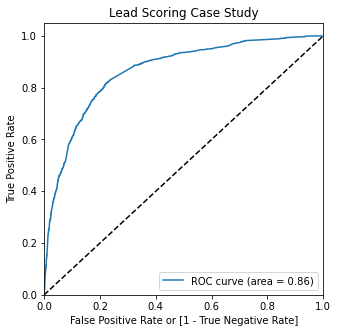

In [83]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

### Finding Optimal Cutoff Point

In [84]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,LeadId,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.268493,8736,0,1,1,1,0,0,0,0,0,0,0
1,1,0.926290,4453,1,1,1,1,1,1,1,1,1,1,1
2,0,0.026283,625,0,1,0,0,0,0,0,0,0,0,0
3,0,0.366984,1525,0,1,1,1,1,0,0,0,0,0,0
4,1,0.383557,3381,0,1,1,1,1,0,0,0,0,0,0


In [85]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.

cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.380945  1.000000  0.000000
0.1   0.1  0.553503  0.978068  0.292240
0.2   0.2  0.725257  0.907634  0.613029
0.3   0.3  0.790810  0.822860  0.771087
0.4   0.4  0.797237  0.759595  0.820400
0.5   0.5  0.794344  0.670181  0.870750
0.6   0.6  0.786472  0.589625  0.907604
0.7   0.7  0.760604  0.455504  0.948352
0.8   0.8  0.735861  0.356811  0.969115
0.9   0.9  0.699550  0.235344  0.985206


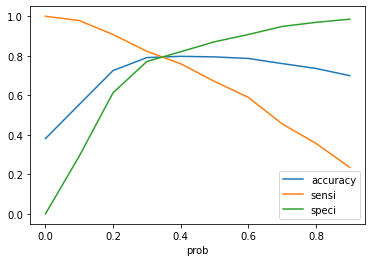

In [86]:
# Let's plot accuracy sensitivity and specificity for various probabilities.

cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

### From the curve above, 0.35 is the optimum point to take it as a cutoff probability.

In [87]:
# Let us make the final prediction using 0.35 as the cut off

y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_Prob.map( lambda x: 1 if x > 0.35 else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,LeadId,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.268493,8736,0,1,1,1,0,0,0,0,0,0,0,0
1,1,0.926290,4453,1,1,1,1,1,1,1,1,1,1,1,1
2,0,0.026283,625,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0.366984,1525,0,1,1,1,1,0,0,0,0,0,0,1
4,1,0.383557,3381,0,1,1,1,1,0,0,0,0,0,0,1


In [88]:
# Now let us calculate the lead score

y_train_pred_final['lead_score'] = y_train_pred_final.Converted_Prob.map(lambda x: round(x*100))
y_train_pred_final.head(10)

,Converted,Converted_Prob,LeadId,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,lead_score
0,0,0.268493,8736,0,1,1,1,0,0,0,0,0,0,0,0,27
1,1,0.926290,4453,1,1,1,1,1,1,1,1,1,1,1,1,93
2,0,0.026283,625,0,1,0,0,0,0,0,0,0,0,0,0,3
3,0,0.366984,1525,0,1,1,1,1,0,0,0,0,0,0,1,37
4,1,0.383557,3381,0,1,1,1,1,0,0,0,0,0,0,1,38
5,0,0.073983,1236,0,1,0,0,0,0,0,0,0,0,0,0,7
6,1,0.889541,6066,1,1,1,1,1,1,1,1,1,1,0,1,89
7,0,0.535312,6004,1,1,1,1,1,1,1,0,0,0,0,1,54
8,0,0.073983,4404,0,1,0,0,0,0,0,0,0,0,0,0,7
9,1,0.666641,1930,1,1,1,1,1,1,1,1,0,0,0,1,67


In [89]:
# checking if 80% cases are correctly predicted based on the converted column.

# get the total of final predicted conversion / non conversion counts from the actual converted rates

checking_df = y_train_pred_final.loc[y_train_pred_final['Converted']==1,['Converted','final_predicted']]
checking_df['final_predicted'].value_counts()

1    1887
0     484
Name: final_predicted, dtype: int64

In [90]:
# check the precentage of final_predicted conversions

round(1887/float(1887+484),2)*100

80.0

##### Hence we can see that the final prediction of conversions have a target of 80% conversion as per the X Educations CEO's requirement . Hence this is a good model.

In [91]:
# Let's check the overall accuracy.

metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7924164524421594

In [92]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3045,  808],
       [ 484, 1887]], dtype=int64)

In [93]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [94]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7958667229017292

In [95]:
# Let us calculate specificity
TN / float(TN+FP)

0.7902932779652219

In [96]:
# Calculate false postive rate - predicting conversions when leads has not converted
FP/ float(TN+FP)

0.20970672203477808

In [97]:
# Positive predictive value 

print (TP / float(TP+FP))

0.7001855287569573


In [98]:
# Negative predictive value

print (TN / float(TN+ FN))

0.862850665911023


### Precision and recall tradeoff

In [99]:
#Looking at the confusion matrix again

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
confusion

array([[3355,  498],
       [ 782, 1589]], dtype=int64)

In [100]:
# precision
precision_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.761379971250599

In [101]:
# recall
recall_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.6701813580767608

In [102]:
y_train_pred_final.Converted, y_train_pred_final.predicted

(0       0
 1       1
 2       0
 3       0
 4       1
        ..
 6219    0
 6220    0
 6221    0
 6222    0
 6223    0
 Name: Converted, Length: 6224, dtype: int64,
 0       0
 1       1
 2       0
 3       0
 4       0
        ..
 6219    0
 6220    0
 6221    0
 6222    0
 6223    0
 Name: predicted, Length: 6224, dtype: int64)

In [103]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

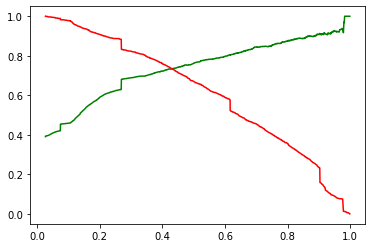

In [104]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

### Making predictions on the test set

In [105]:
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])


In [106]:
X_test = X_test[col]
X_test.head()

,Do Not Email,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Notable Activity_Email Link Clicked,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable
2146,0,-0.369918,0,0,0,0,0,0,0,0,0
400,1,1.598716,0,0,0,0,0,0,0,0,0
2207,0,-0.883156,0,1,0,0,0,0,1,0,0
574,0,-0.177453,0,0,0,0,0,0,0,0,0
5268,1,-0.786007,0,0,0,1,0,0,0,0,0


In [107]:
X_test_sm = sm.add_constant(X_test)

In [108]:
y_test_pred = res.predict(X_test_sm)

In [109]:
# Converting y_pred to a dataframe which is an array

y_pred_1 = pd.DataFrame(y_test_pred)

In [110]:
# Converting y_test to dataframe

y_test_df = pd.DataFrame(y_test)

In [111]:
# Putting LeadId to index

y_test_df['LeadId'] = y_test_df.index

In [112]:
# Removing index for both dataframes to append them side by side 

y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [113]:
# Appending y_test_df and y_pred_1

y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [114]:
y_pred_final.head()

,Converted,LeadId,0
0,0,2146,0.173475
1,1,400,0.343184
2,0,2207,0.137192
3,0,574,0.206017
4,0,5268,0.009664


In [115]:
# Renaming the column 

y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})

In [116]:
# Based on cut off threshold using accuracy, sensitivity and specificity of 0.35%

y_pred_final['final_predicted'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.35 else 0)

In [117]:
# Now let us calculate the lead score

y_pred_final['lead_score'] = y_pred_final.Converted_Prob.map(lambda x: round(x*100))
y_pred_final.head(20)

,Converted,LeadId,Converted_Prob,final_predicted,lead_score
0,0,2146,0.173475,0,17
1,1,400,0.343184,0,34
2,0,2207,0.137192,0,14
3,0,574,0.206017,0,21
4,0,5268,0.009664,0,1
5,0,2177,0.173765,0,17
6,1,6120,0.362086,1,36
7,0,8307,0.112630,0,11
8,1,8220,0.895979,1,90
9,0,95,0.464907,1,46


In [118]:
# checking if 80% cases are correctly predicted based on the converted column.

# get the total of final predicted conversion or non conversion counts from the actual converted rates

checking_test_df = y_pred_final.loc[y_pred_final['Converted']==1,['Converted','final_predicted']]
checking_test_df['final_predicted'].value_counts()

1    813
0    193
Name: final_predicted, dtype: int64

In [119]:
# check the precentage of final_predicted conversions on test data

round(813/float(813+193),2)*100

81.0

### Hence we satisfy the condition on test set too (>80%)

In [120]:
# Let's check the accuracy.

metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.8013493253373314

In [121]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1325,  337],
       [ 193,  813]], dtype=int64)

In [122]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [123]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8081510934393639

In [124]:
# Let us calculate specificity
TN / float(TN+FP)

0.7972322503008423

In [125]:
# precision
print('precision ',precision_score(y_pred_final.Converted, y_pred_final.final_predicted))

# recall
print('recall ',recall_score(y_pred_final.Converted, y_pred_final.final_predicted))

precision  0.7069565217391305
recall  0.8081510934393639


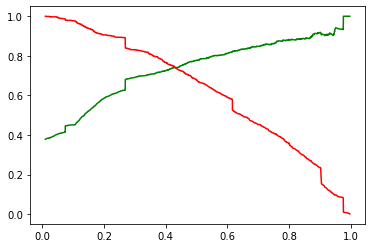

In [126]:
p, r, thresholds = precision_recall_curve(y_pred_final.Converted, y_pred_final.Converted_Prob)

plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

Conclusion :

- While we have checked both Sensitivity-Specificity as well as Precision and Recall Metrics, we have considered the
  optimal 
  cut off based on Sensitivity and Specificity for calculating the final prediction.
- Accuracy, Sensitivity and Specificity values of test set are around 80%, 81% and 79.7% which are approximately closer to 
  the respective values calculated using trained set.
- Also the lead score calculated in the trained set of data shows the conversion rate on the final predicted model is 80%
- Hence overall this model seems to be good.